In [321]:
import numpy as np
import pandas as pd 
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score # other metrics are allowed here.

## Data Pre-Processing

In [322]:
# Read in the csv file
data = pd.read_csv("cleveland.csv")

In [323]:
# pairplot to check the correlation
#fig = sns.pairplot(data)
#fig.savefig("./pair_plot.png", dpi = 1000)

In [324]:
# read in the index file
with open('experiments.pkl', 'rb') as f:
    inds = pkl.load(f)

# shuffle the dataframe according to the index, and
# split the dataframe into 0.8/0.2 train-test sets.
train_inds, test_inds = inds[:int(0.8*len(inds))], inds[int(0.8*len(inds)):]

# convert the target value to {-1, 1}
for i in range(0, data.shape[0]):
    if data['target'].loc[data.index[i]] > 0:
        data.loc[i, 'target'] = 1
    else:
        data.loc[i, 'target'] = -1
# target value: 0-healthy, 1,2,3,4-high risk of heart disease
data

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,-1
1,1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,-1
4,4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [325]:
train_set = data.loc[train_inds]
test_set = data.loc[test_inds]

# scale the data (train & test) using the sklearn StandardScaler.
scaler = StandardScaler()
train_param = scaler.fit_transform(train_set.iloc[:, 1: 14])
test_param = scaler.fit_transform(test_set.iloc[:, 1: 14])
train_target = train_set.iloc[:, 14: 15]
test_target = test_set.iloc[:, 14: 15]

train_param

array([[-0.73545228, -1.38407465, -0.13972393, ..., -1.0057096 ,
        -0.69292967, -0.87575498],
       [ 0.60525922, -1.38407465, -0.13972393, ..., -1.0057096 ,
         0.38199969, -0.87575498],
       [ 0.9404371 ,  0.72250438,  0.88491822, ...,  0.6387615 ,
         0.38199969,  1.20712172],
       ...,
       [ 1.61079285, -1.38407465, -2.18900823, ..., -1.0057096 ,
         1.45692905, -0.87575498],
       [-1.07063016,  0.72250438,  0.88491822, ..., -1.0057096 ,
        -0.69292967, -0.87575498],
       [-0.28854845,  0.72250438,  0.88491822, ..., -1.0057096 ,
         1.45692905,  1.20712172]])

## Model Training and Simple Evaluation

In [331]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# logistic regression
# upload your logistic_regression.py
def sigmoid(x):
    # the sigmoid function
    return 1. / (1. + np.exp(-x))

class LogisticReg(object):
    def __init__(self, indim=1):
        # initialize the parameters with all zeros
        # w: shape of [d+1, 1]
        self.w = np.zeros(shape=(indim + 1, 1))

    def set_param(self, weights, bias):
        # helper function to set the parameters
        # NOTE: you need to implement this to pass the autograde.
        # weights: vector of shape [d, ]
        # bias: scaler
        self.w[:-1, :] = weights.reshape(weights.shape[0], 1)
        self.w[-1, 0] = bias

    def get_param(self):
        # helper function to return the parameters
        # NOTE: you need to implement this to pass the autograde.
        # returns:
        # weights: vector of shape [d, ]
        # bias: scaler
        weights = self.w[:-1, :].reshape(self.w[:-1, :].shape[0],)
        bias = self.w[-1, 0]
        return weights, bias

    def compute_loss(self, X, t):
        # compute the loss
        # X: feature matrix of shape [N, d]
        # t: input label of shape [N, ]
        # NOTE: return the average of the log-likelihood, NOT the sum.

        # extend the input matrix

        # compute the loss and return the loss
        # X变换
        # t变换
        # 套公式
        X = np.hstack([X, np.ones(shape=[X.shape[0], 1])])
        t = np.expand_dims(t, 1)
        z = sigmoid((X @ self.w) * t)
        return -np.log(z).mean()

    def compute_grad(self, X, t):
        # X: feature matrix of shape [N, d]
        # grad: shape of [d, 1]
        # NOTE: return the average gradient, NOT the sum.
        X = np.hstack([X, np.ones(shape=[X.shape[0], 1])])
        t = np.expand_dims(t, 1)
        z = sigmoid(X @ self.w * t)
        return (- (1 - z) * (t * X)).mean(axis=1, keepdims=True)[0][0].reshape(X.shape[1],1)


    def update(self, grad, lr=0.001):
        # update the weights
        # by the gradient descent rule

        # 梯度下降法
        self.w = self.w - grad.T * lr

    def fit(self, X, t, lr=0.001, max_iters=1000, eps=1e-7):
        # implement the .fit() using the gradient descent method.
        # args:
        #   X: input feature matrix of shape [N, d]
        #   t: input label of shape [N, ]
        #   lr: learning rate
        #   max_iters: maximum number of iterations
        #   eps: tolerance of the loss difference
        # TO NOTE:
        #   extend the input features before fitting to it.
        #   return the weight matrix of shape [indim+1, 1]

        loss = 1e10
        j = 1
        for epoch in range(max_iters):
            # compute the loss
            new_loss = self.compute_loss(X, t)

            # compute the gradient
            grad = self.compute_grad(X, t)

            # update the weight
            self.update(grad, lr=lr)
            log = "loss for epoch " + str(j) + " is:" + str(new_loss)
            print(log)
            j += 1
            # decide whether to break the loop
            if np.abs(new_loss - loss) < eps:
                return self.w

    def predict_prob(self, X):
        # implement the .predict_prob() using the parameters learned by .fit()
        # X: input feature matrix of shape [N, d]
        #   NOTE: make sure you extend the feature matrix first,
        #   the same way as what you did in .fit() method.
        # returns the prediction (likelihood) of shape [N, ]
        X = np.hstack([X, np.ones(shape=[X.shape[0], 1])])
        return sigmoid(np.dot(X, self.w))

    def predict(self, X, threshold=0.5):
        # implement the .predict() using the .predict_prob() method
        # X: input feature matrix of shape [N, d]
        # returns the prediction of shape [N, ], where each element is -1 or 1.
        # if the probability p>threshold, we determine t=1, otherwise t=-1
        res = []
        X = self.predict_prob(X)
        for x in np.nditer(X):
            if x > threshold:
                res.append(1)
            else:
                res.append(-1)
        return np.array(res).T
# from logisitic_regression import LogisticReg
# create the model
model = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
# train the model
model.fit(train_param, train_target)
# plot the training & test losses.
predict_train = model.predict(train_param)
predict_test = model.predict(test_param)

In [332]:
# report the training and testing accuracies

## Classification Metrics

In [333]:
# Confusion Matrix
predict_train = np.array(predict_train)
predict_test = np.array(predict_test)

def get_mat_and_f1(predict, target):
    predict = predict.reshape(predict.shape[0],1)
    target = np.array(target)
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(0, target.shape[0]):
        if predict[i] == 1 and target[i] == 1:
            tp += 1
        elif predict[i] == 1 and target[i] == -1:
            fp += 1
        elif predict[i] == -1 and target[i] == 1:
            tn += 1
        else:
            fn += 1
# F1 Score
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 / (1 / precision + 1 / recall)
    return np.array([[tp, fp], [tn, fn]]), f1

# Other metrics
train_mat, train_f1 = get_mat_and_f1(predict_train, train_target)
test_mat, test_f1 = get_mat_and_f1(predict_test, test_target)
print("confusion matrix for train set is")
print(train_mat)
print("f1 for train set is")
print(test_mat)
print("confusion matrix for test set is")
print(train_f1)
print("f1 for test set is")
print(test_f1)

confusion matrix for train set is
[[ 87   3]
 [ 25 127]]
f1 for train set is
[[21  9]
 [ 6 25]]
confusion matrix for test set is
0.5723684210526315
f1 for test set is
0.5526315789473684


C:\Users\BowenDeng\.conda\envs\data\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BowenDeng\.conda\envs\data\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BowenDeng\.conda\envs\data\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BowenDeng\.conda\envs\data\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[ 19  62 106 149 193] [[1.         1.         1.         1.         1.        ]
 [0.90322581 0.88709677 0.87096774 0.87096774 0.87096774]
 [0.90566038 0.88679245 0.88679245 0.87735849 0.87735849]
 [0.89261745 0.88590604 0.87248322 0.88590604 0.87919463]
 [0.89637306 0.88601036 0.89119171 0.88082902 0.88601036]]


ValueError: x and y must have same first dimension, but have shapes (1,) and (5,)

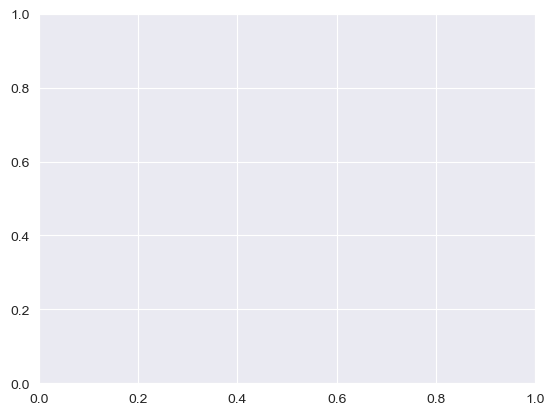

In [330]:
# Further analysis and improvement.